In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("CIC-IDS-2018-attacks.csv")

In [15]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [16]:
data.shape

(8284195, 80)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8284195 entries, 0 to 8284194
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [18]:
data['Label'].value_counts()

Label
Benign                      6112151
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
Bot                          286191
FTP-BruteForce               193360
SSH-Bruteforce               187589
Infilteration                161934
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                611
Brute Force -XSS                230
SQL Injection                    87
Name: count, dtype: int64

In [19]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

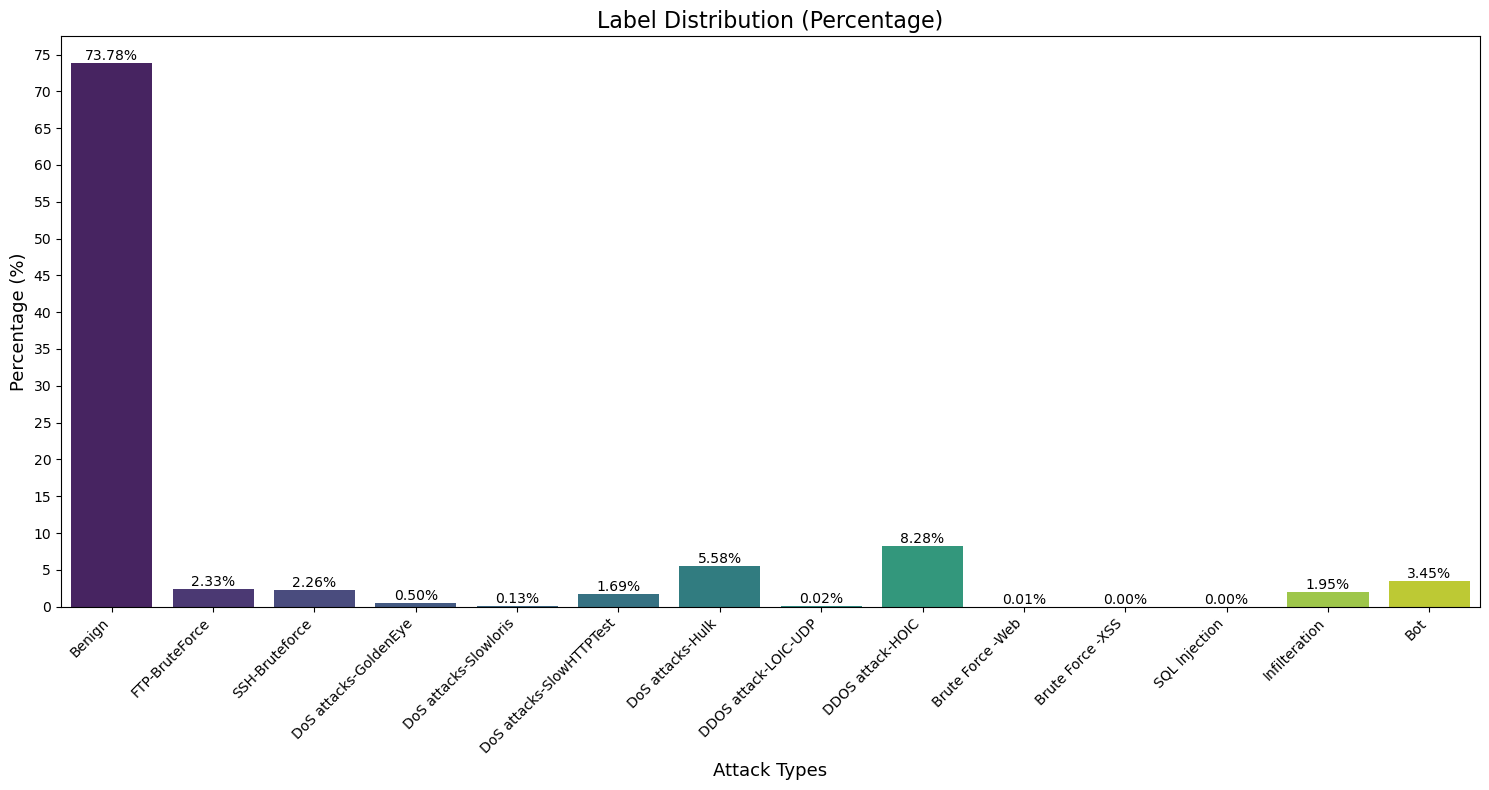

In [20]:
plt.figure(figsize=(15, 8))
plt.yticks(np.arange(0, 100, 5))

ax = sns.countplot(
    x="Label",
    data=data,
    stat="percent",
    hue="Label",          
    legend=False,       
    palette="viridis"    
)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha("right")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", label_type='edge', fontsize=10)

ax.set_title("Label Distribution (Percentage)", fontsize=16)
ax.set_xlabel("Attack Types", fontsize=13)
ax.set_ylabel("Percentage (%)", fontsize=13)
plt.tight_layout()
plt.show()

# Data Cleaning 

In [21]:
data = data.drop(columns=["Timestamp", "Dst Port"])

In [22]:
data['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'Infilteration', 'Bot'],
      dtype=object)

# Encodeing the 'Protocol' columns using One-Hot Encoding beacuse it is a categorical value 

In [23]:
data["Protocol"].unique()

array([ 0,  6, 17])

In [24]:
data = data.astype({"Protocol": str})
data["Protocol"].unique()

array(['0', '6', '17'], dtype=object)

In [25]:
data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

In [26]:
protocol_cols = [col for col in data.columns if col.startswith("Protocol_")]
display(data[protocol_cols + ["Label"]].head(10))

,Protocol_17,Protocol_6,Label
0,False,False,Benign
1,False,False,Benign
2,False,False,Benign
3,False,True,Benign
4,False,True,Benign
5,False,True,Benign
6,False,False,Benign
7,False,False,Benign
8,False,True,Benign
9,False,True,Benign


## Identify which column(s) contain NaN values

In [27]:
rowsNan = data.isna().sum().sum()
print("Number of rows with NaN values:", rowsNan)

Number of rows with NaN values: 22954


In [28]:
data.columns.to_series()[data.isna().any()]

Flow Byts/s    Flow Byts/s
dtype: object

In [29]:
data = data.dropna()

In [30]:
data.shape

(8261241, 79)

In [31]:
cols = data.columns.drop('Label')
for col in cols:
    data[col] = pd.to_numeric(data[col])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8261241 entries, 0 to 8284194
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    int64  
 4   TotLen Bwd Pkts    float64
 5   Fwd Pkt Len Max    int64  
 6   Fwd Pkt Len Min    int64  
 7   Fwd Pkt Len Mean   float64
 8   Fwd Pkt Len Std    float64
 9   Bwd Pkt Len Max    int64  
 10  Bwd Pkt Len Min    int64  
 11  Bwd Pkt Len Mean   float64
 12  Bwd Pkt Len Std    float64
 13  Flow Byts/s        float64
 14  Flow Pkts/s        float64
 15  Flow IAT Mean      float64
 16  Flow IAT Std       float64
 17  Flow IAT Max       float64
 18  Flow IAT Min       float64
 19  Fwd IAT Tot        float64
 20  Fwd IAT Mean       float64
 21  Fwd IAT Std        float64
 22  Fwd IAT Max        float64
 23  Fwd IAT Min        float64
 24  Bwd IAT Tot        float64
 25  Bwd IAT Mean       floa

## Handling Infinite values 

In [33]:
data = data.replace(np.inf, np.nan)
print("Number of rows with infinite values:", data.isna().sum().sum())

Number of rows with infinite values: 26706


In [34]:
data.columns.to_series()[data.isna().any()]

Flow Byts/s    Flow Byts/s
Flow Pkts/s    Flow Pkts/s
dtype: object

In [35]:
print(f'Max of Flow Bytes/s: { max(data["Flow Byts/s"]) }')
print(f'Max of Flow Pkts/s: { max(data["Flow Pkts/s"]) }')

Max of Flow Bytes/s: 1806642857.14286
Max of Flow Pkts/s: 4000000.0


In [36]:
data['Flow Byts/s'] = data['Flow Byts/s'].replace(np.nan, max(data["Flow Byts/s"]))
data['Flow Pkts/s'] = data['Flow Pkts/s'].replace(np.nan, max(data['Flow Pkts/s']))

In [37]:
data.isna().sum().sum()

np.int64(0)

In [38]:
data.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,...,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06,8.261241e+06
mean,1.019220e+07,2.989680e+01,5.944999e+00,1.225179e+03,4.477231e+03,2.302738e+02,8.969332e+00,5.493778e+01,8.719593e+01,3.116571e+02,...,2.636643e+01,1.993248e+01,9.035464e+04,4.198507e+04,1.431205e+05,6.380588e+04,4.879042e+06,3.898415e+05,5.544711e+06,4.389599e+06
std,6.917550e+08,1.748329e+03,1.697931e+02,7.789408e+04,2.407032e+05,3.378290e+02,2.408339e+01,6.856006e+01,1.369121e+02,4.655488e+02,...,1.747164e+03,8.471909e+00,1.482386e+06,8.581070e+05,1.963685e+06,1.271419e+06,3.688037e+08,2.371566e+08,8.764899e+08,8.797298e+07
min,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.290000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.352400e+04,2.000000e+00,1.000000e+00,4.300000e+01,9.000000e+01,4.000000e+01,0.000000e+00,3.500000e+01,0.000000e+00,7.900000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.731841e+06,5.000000e+00,4.000000e+00,6.710000e+02,3.640000e+02,3.740000e+02,0.000000e+00,8.981818e+01,1.598770e+02,3.500000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,3.096290e+05,1.231180e+05,1.443918e+08,1.563604e+08,6.444000e+04,1.460000e+03,1.652931e+04,1.840158e+04,6.516000e+04,...,3.096280e+05,5.600000e+01,1.140000e+08,7.495336e+07,1.140000e+08,1.140000e+08,3.955714e+11,2.622479e+11,9.797810e+11,2.399340e+11


In [39]:
data["Label"].value_counts()

Label
Benign                      6090041
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
Bot                          286191
FTP-BruteForce               193354
SSH-Bruteforce               187589
Infilteration                161096
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                611
Brute Force -XSS                230
SQL Injection                    87
Name: count, dtype: int64

# Encoding Lables 

In [40]:
attack_labels = [
    'DDOS attack-HOIC', 'DoS attacks-Hulk', 'Bot', 'FTP-BruteForce',
    'SSH-Bruteforce', 'Infilteration', 'DoS attacks-SlowHTTPTest',
    'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP',
    'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'
]

data['Label'] = data['Label'].replace(attack_labels, 'Malicious')

print(data['Label'].value_counts())
labels = data['Label'].value_counts().index.tolist()
counts = data['Label'].value_counts().values.tolist()

Label
Benign       6090041
Malicious    2171200
Name: count, dtype: int64


In [41]:
data.shape

(8261241, 79)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Label'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
data["Label"] = le.transform(data["Label"])
mapping

{'Benign': np.int64(0), 'Malicious': np.int64(1)}

In [43]:
print("Label Encoding Mapping:")
for k, v in mapping.items():
    print(f"{k} → {v}")

Label Encoding Mapping:
Benign → 0
Malicious → 1


In [44]:
reverse_mapping = {v: k for k, v in mapping.items()}

class_counts = data["Label"].value_counts().sort_index()
print("Class distribution:\n")
for code, count in class_counts.items():
    name = reverse_mapping.get(code, "Unknown")
    print(f"{name:<30} (encoded as {code}): {count}")

Class distribution:

Benign                         (encoded as 0): 6090041
Malicious                      (encoded as 1): 2171200


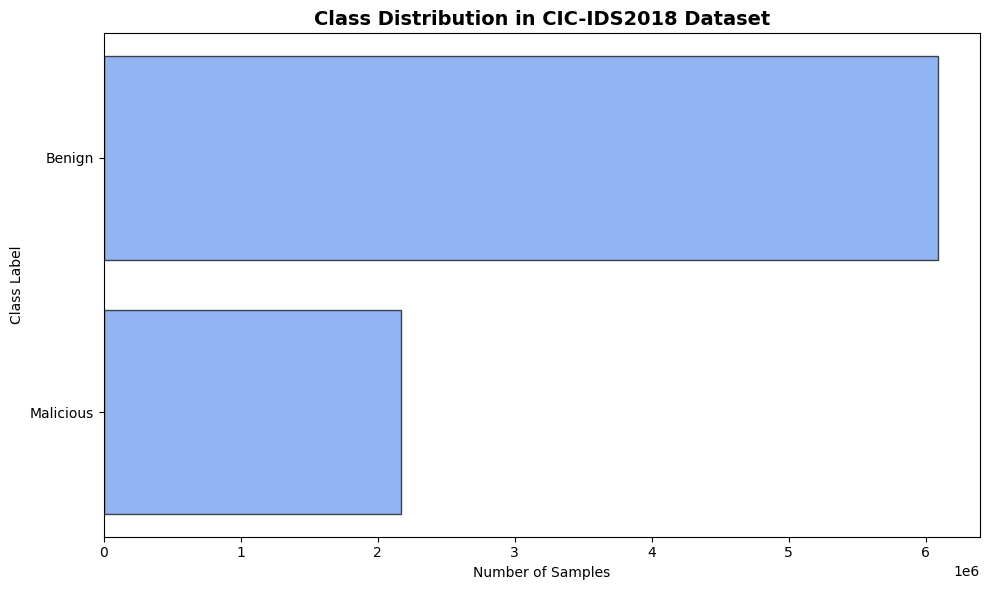

In [45]:
labels = [reverse_mapping[i] for i in class_counts.index]
counts = class_counts.values
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='cornflowerblue', edgecolor='black',alpha=0.7)
plt.title("Class Distribution in CIC-IDS2018 Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Number of Samples")
plt.ylabel("Class Label")
plt.gca().invert_yaxis()  # Highest count (Benign) at the top
plt.tight_layout()
plt.show()

# Converting Columns to float

### If numeric columns appear as object type (often due to formatting errors or stray "Label" rows), convert them to float to ensure proper numerical processing and model compatibility.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8261241 entries, 0 to 8284194
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    int64  
 4   TotLen Bwd Pkts    float64
 5   Fwd Pkt Len Max    int64  
 6   Fwd Pkt Len Min    int64  
 7   Fwd Pkt Len Mean   float64
 8   Fwd Pkt Len Std    float64
 9   Bwd Pkt Len Max    int64  
 10  Bwd Pkt Len Min    int64  
 11  Bwd Pkt Len Mean   float64
 12  Bwd Pkt Len Std    float64
 13  Flow Byts/s        float64
 14  Flow Pkts/s        float64
 15  Flow IAT Mean      float64
 16  Flow IAT Std       float64
 17  Flow IAT Max       float64
 18  Flow IAT Min       float64
 19  Fwd IAT Tot        float64
 20  Fwd IAT Mean       float64
 21  Fwd IAT Std        float64
 22  Fwd IAT Max        float64
 23  Fwd IAT Min        float64
 24  Bwd IAT Tot        float64
 25  Bwd IAT Mean       floa

In [47]:
string_columns = [col for col in data.columns if data[col].dtype == 'object']
print("Columns with string values:", string_columns)

Columns with string values: []


# Dropping negative values

In [48]:
data = data[data.ge(0).all(axis=1)]

In [49]:
data.shape

(4238432, 79)

In [50]:
print(data['Label'].value_counts())
labels = data['Label'].value_counts().index.tolist()
counts = data['Label'].value_counts().values.tolist()

Label
0    3262780
1     975652
Name: count, dtype: int64


# Dropping Duplicates values 

In [51]:
dataDuplicates = data.duplicated().sum().sum()
print("Number of duplicate rows:", dataDuplicates)

Number of duplicate rows: 701484


In [52]:
data = data.drop_duplicates(ignore_index=True)

In [53]:
len(data)

3536948

In [54]:
class_counts = data["Label"].value_counts()
print("Class distribution:\n")
print(class_counts)

Class distribution:

Label
0    3019758
1     517190
Name: count, dtype: int64


In [55]:
features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
       'Protocol_17', 'Protocol_6', 'Label']

data = data[features]
data.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
   

In [56]:
data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,6453966,15,10,1239,2273.0,744,0,82.600000,196.741237,976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
1,8804066,14,11,1143,2209.0,744,0,81.642857,203.745545,976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
2,6989341,16,12,1239,2273.0,744,0,77.437500,190.831154,976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
3,476513,5,3,211,463.0,211,0,42.200000,94.362069,463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
4,475048,5,3,220,472.0,220,0,44.000000,98.386991,472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536943,3982183,14,8,1442,1731.0,725,0,103.000000,191.125412,1179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
3536944,3802316,14,8,1440,1731.0,725,0,102.857143,191.172841,1179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
3536945,4004239,14,8,1459,1731.0,741,0,104.214286,195.113450,1179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
3536946,3998435,14,8,1459,1731.0,741,0,104.214286,195.113450,1179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0


# Data Transformations (Normalizing Dataset Using MinMaxScaler)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(data[data.columns[:78]])

In [58]:
normalized_data = pd.DataFrame(normalized_features, columns=data.columns[:78])
normalized_data["Label"] = data["Label"]

In [59]:
normalized_data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,0.053783,0.000241,0.000073,0.000142,0.000015,0.011546,0.0,0.004997,0.010692,0.014979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.073367,0.000224,0.000081,0.000131,0.000014,0.011546,0.0,0.004939,0.011072,0.014979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.058245,0.000258,0.000089,0.000142,0.000015,0.011546,0.0,0.004685,0.010370,0.014979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.003971,0.000069,0.000016,0.000024,0.000003,0.003274,0.0,0.002553,0.005128,0.007106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.003959,0.000069,0.000016,0.000025,0.000003,0.003414,0.0,0.002662,0.005347,0.007244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536943,0.033185,0.000224,0.000057,0.000165,0.000011,0.011251,0.0,0.006231,0.010386,0.018094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3536944,0.031686,0.000224,0.000057,0.000165,0.000011,0.011251,0.0,0.006223,0.010389,0.018094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3536945,0.033369,0.000224,0.000057,0.000167,0.000011,0.011499,0.0,0.006305,0.010603,0.018094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3536946,0.033320,0.000224,0.000057,0.000167,0.000011,0.011499,0.0,0.006305,0.010603,0.018094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
normalized_data.to_csv("CSE-CIC-IDS2018_Normalized.csv", index=False)
print("Normalized dataset saved as 'CIC-IDS2018_Normalized.csv'")

Normalized dataset saved as 'CIC-IDS2018_Normalized.csv'


In [61]:
X = normalized_data
y = normalized_data['Label']
X = X.drop(columns = ['Label'])

Feature Selection 
Using K best Features according to some scoring function 
Selecting top 10 feature from the 78 features were selected 

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 10 features
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print(f"Shape of selected features: {selected_features.shape}")
X_selected = X[selected_features]
print("\nTop 10 Selected Features and Their Scores:\n")
for feature, score in zip(selected_features, selector.scores_[selector.get_support()]):
    print(f"{feature:<30} : {score:.4f}")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [30 32 54 55 56 57 58 59 76 77] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of selected features: (15,)

Top 10 Selected Features and Their Scores:

Flow Duration                  : 55787.7640
Fwd Pkt Len Max                : 91058.9834
Fwd Pkt Len Std                : 42286.7650
Flow IAT Max                   : 30041.1421
Fwd IAT Tot                    : 52768.9738
Fwd IAT Std                    : 41593.0433
Bwd IAT Tot                    : 44614.2273
RST Flag Cnt                   : 201777.3934
PSH Flag Cnt                   : 91623.6814
ACK Flag Cnt                   : 94434.9591
ECE Flag Cnt                   : 201778.3977
Down/Up Ratio                  : 133769.7225
Init Fwd Win Byts              : 282538.1838
Init Bwd Win Byts              : 247216.0980
Fwd Seg Size Min               : 68348.6061


Feature Score

In [63]:
scores = pd.DataFrame(selector.scores_[selector.get_support()] , index=selected_features, columns=['Score'])
scores.sort_values('Score', ascending=False)

,Score
Init Fwd Win Byts,282538.183785
Init Bwd Win Byts,247216.098012
ECE Flag Cnt,201778.397682
RST Flag Cnt,201777.393350
Down/Up Ratio,133769.722549
ACK Flag Cnt,94434.959119
PSH Flag Cnt,91623.681401
Fwd Pkt Len Max,91058.983416
Fwd Seg Size Min,68348.606140
Flow Duration,55787.764015


# Dataset after feature selection 

In [64]:
df_c = pd.concat([X_selected, y], axis=1)
df_c

,Flow Duration,Fwd Pkt Len Max,Fwd Pkt Len Std,Flow IAT Max,Fwd IAT Tot,Fwd IAT Std,Bwd IAT Tot,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
0,0.053783,0.011546,0.010692,0.005616,0.053783,0.001529,0.046983,0.0,1.0,0.0,0.0,0.0,1.000000,0.003555,0.333333,0
1,0.073367,0.011546,0.011072,0.016068,0.073367,0.006614,0.064296,0.0,1.0,0.0,0.0,0.0,0.088624,0.003555,0.333333,0
2,0.058245,0.011546,0.010370,0.007926,0.058245,0.003036,0.049838,0.0,1.0,0.0,0.0,0.0,0.088624,0.003571,0.000000,0
3,0.003971,0.003274,0.005128,0.001981,0.003971,0.001707,0.001989,0.0,1.0,0.0,0.0,0.0,0.222782,0.003342,0.333333,0
4,0.003959,0.003414,0.005347,0.001979,0.003959,0.001703,0.001979,0.0,1.0,0.0,0.0,0.0,0.222782,0.003342,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536943,0.033185,0.011251,0.010386,0.007945,0.033185,0.004234,0.032757,1.0,1.0,0.0,1.0,0.0,0.125002,0.954574,0.000000,0
3536944,0.031686,0.011251,0.010389,0.007816,0.031686,0.004232,0.031115,1.0,1.0,0.0,1.0,0.0,0.125002,0.954604,0.000000,0
3536945,0.033369,0.011499,0.010603,0.008097,0.033369,0.004613,0.032564,1.0,1.0,0.0,1.0,0.0,0.125002,0.955612,0.000000,0
3536946,0.033320,0.011499,0.010603,0.007945,0.033320,0.004230,0.032932,1.0,1.0,0.0,1.0,0.0,0.125002,0.954314,0.000000,0


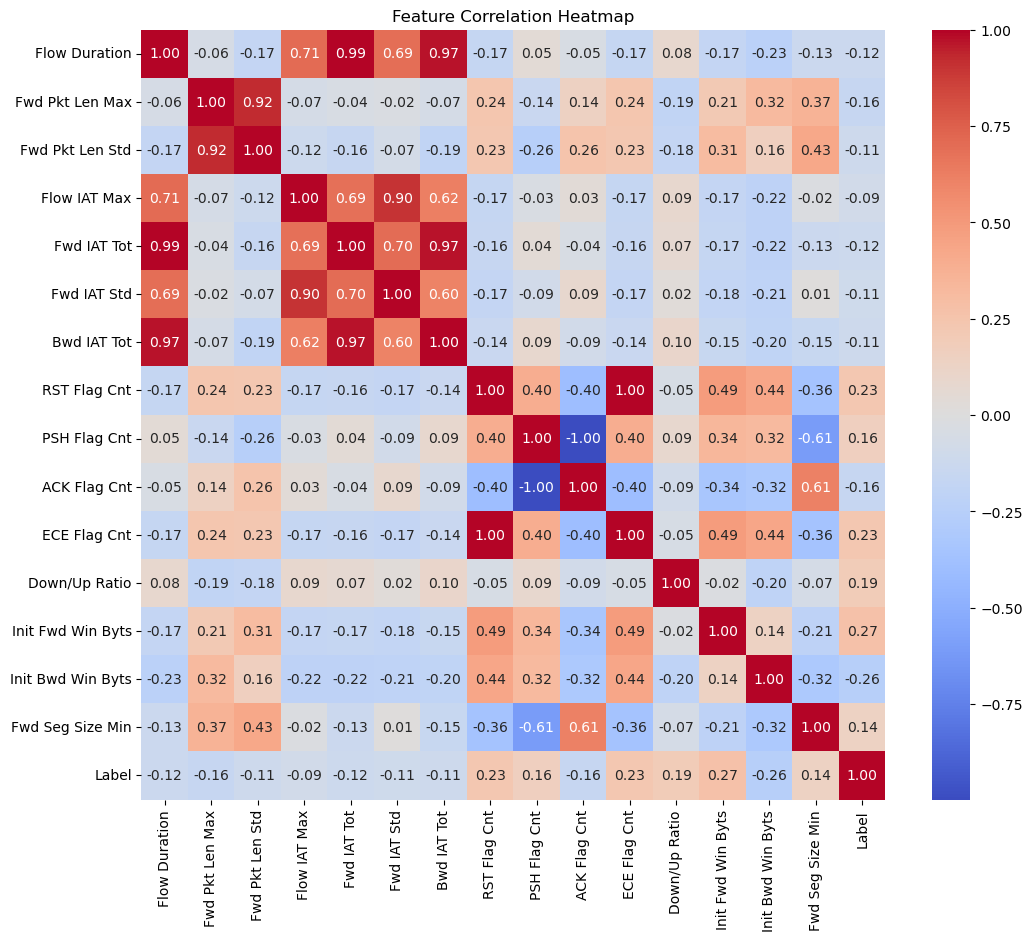

In [65]:
correlation_matrix = df_c.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.savefig('corr_plot.png')
plt.show()

# Model Training

In [66]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [67]:
X_test

,Flow Duration,Fwd Pkt Len Max,Fwd Pkt Len Std,Flow IAT Max,Fwd IAT Tot,Fwd IAT Std,Bwd IAT Tot,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min
3449925,2.313018e-02,0.010506,0.012389,7.945958e-03,2.313018e-02,0.005001,0.021481,1.0,1.0,0.0,1.0,0.004219,0.125002,0.959121,0.000000
1200876,3.588796e-02,0.014510,0.022723,3.520742e-02,3.588796e-02,0.026076,0.000337,0.0,0.0,1.0,0.0,0.000000,0.003342,0.003220,0.333333
2442708,1.889571e-02,0.002173,0.003365,8.107958e-03,1.889508e-02,0.003963,0.018895,0.0,1.0,0.0,0.0,0.004219,0.125002,0.000000,0.000000
1143164,3.595279e-02,0.014510,0.022723,3.512687e-02,3.595279e-02,0.025980,0.000344,0.0,0.0,1.0,0.0,0.000000,0.003616,0.003220,0.333333
2055409,3.349762e-02,0.011251,0.010385,7.942583e-03,3.349762e-02,0.004129,0.031910,1.0,1.0,0.0,1.0,0.000000,0.125002,0.954665,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431384,1.453583e-04,0.005059,0.010228,1.366750e-04,1.391167e-04,0.000142,0.000145,1.0,1.0,0.0,1.0,0.004219,1.000000,0.003342,0.000000
390641,4.941945e-02,0.001505,0.002636,4.890224e-02,5.172083e-04,0.000442,0.049418,0.0,1.0,0.0,0.0,0.004219,0.125002,0.002152,0.000000
2928341,1.070392e-03,0.003011,0.006087,5.361750e-04,5.376833e-04,0.000564,0.000534,1.0,1.0,0.0,1.0,0.004219,0.125002,0.149706,0.000000
2126010,5.555159e-02,0.001505,0.002636,5.503727e-02,5.143250e-04,0.000439,0.055551,0.0,1.0,0.0,0.0,0.004219,0.125002,0.002152,0.000000


In [60]:
from imblearn.combine import SMOTEENN

In [61]:
smote_enn = SMOTEENN(random_state=42)
x_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train, y_train)


In [62]:
print("After applying SMOTEENN:")
print(y_train_balanced.value_counts())

After applying SMOTEENN:
Label
1    2006791
0    1971530
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(x_train_balanced, y_train_balanced) 
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy of model: {accuracy}\n")
report = classification_report(y_test, predictions)
print(report)

Accuracy of model: 0.9724527252764859

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    905953
           1       0.89      0.93      0.91    155132

    accuracy                           0.97   1061085
   macro avg       0.94      0.95      0.95   1061085
weighted avg       0.97      0.97      0.97   1061085



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
df_matrix = pd.DataFrame(conf_matrix, index=reverse_mapping.keys(), columns=reverse_mapping.keys())


,0,1
0,887644,18309
1,10921,144211


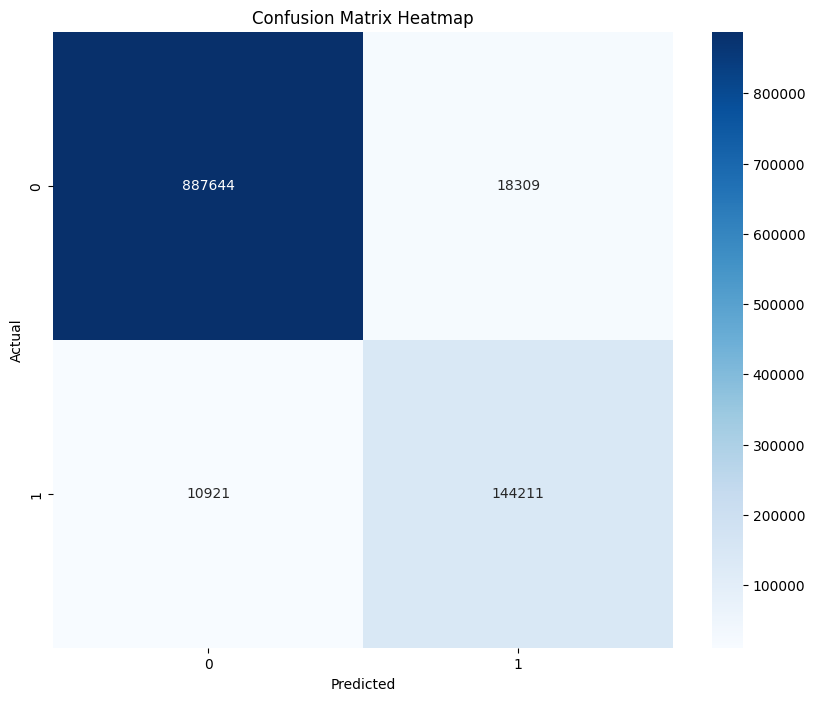

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(X_train, y_train) 



RandomForestClassifier()

In [83]:
# Evaluate the model by letting it classify the testing data and compare the results with the actual labels
rf_predictions = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of model: {rf_accuracy}\n")
report = classification_report(y_test, rf_predictions)
print(report)

Accuracy of model: 0.9806641315257496

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    905953
           1       0.96      0.91      0.93    155132

    accuracy                           0.98   1061085
   macro avg       0.97      0.95      0.96   1061085
weighted avg       0.98      0.98      0.98   1061085



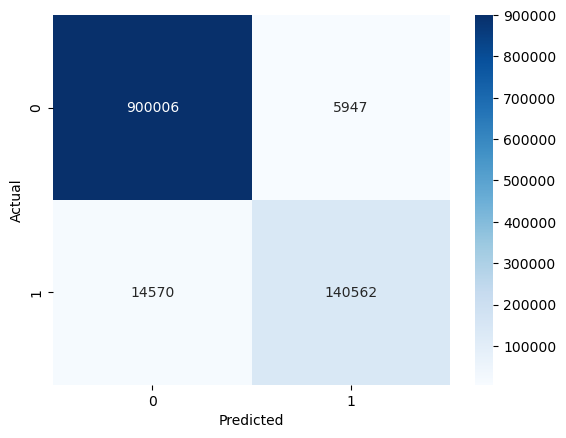

In [84]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
df_matrix = pd.DataFrame(conf_matrix, index=reverse_mapping.keys(), columns=reverse_mapping.keys())
sns.heatmap(df_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [85]:
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Accuracy of model: {gnb_accuracy}\n")
report = classification_report(y_test, gnb_predictions)
print(report)


Accuracy of model: 0.8036406131459779

              precision    recall  f1-score   support

           0       0.97      0.79      0.87    905953
           1       0.42      0.88      0.57    155132

    accuracy                           0.80   1061085
   macro avg       0.70      0.83      0.72   1061085
weighted avg       0.89      0.80      0.83   1061085



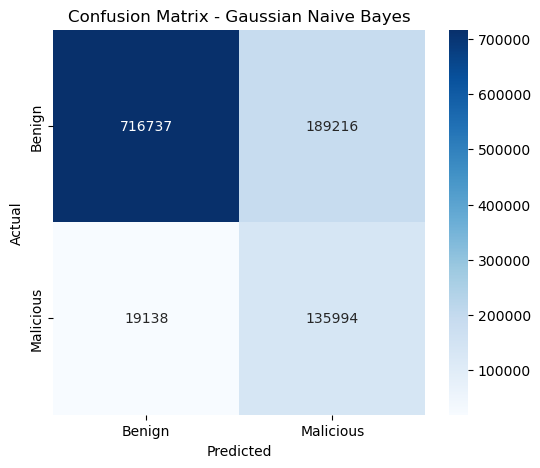

In [87]:
mapping = {0: "Benign", 1: "Malicious"}
conf_matrix = confusion_matrix(y_test, gnb_predictions)
df_matrix = pd.DataFrame(
    conf_matrix,
    index=mapping.values(),
    columns=mapping.values()
)
plt.figure(figsize=(6,5))
sns.heatmap(df_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

ada_base = DecisionTreeClassifier(max_depth=2, random_state=42)
ada = AdaBoostClassifier(
    estimator=ada_base,  
    n_estimators=300,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=300, random_state=42)

In [88]:
ada_predictions = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f"Accuracy of model: {ada_accuracy}\n")
report = classification_report(y_test, ada_predictions)
print(report)

Accuracy of model: 0.9825932889448065

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    905953
           1       0.99      0.89      0.94    155132

    accuracy                           0.98   1061085
   macro avg       0.99      0.94      0.96   1061085
weighted avg       0.98      0.98      0.98   1061085



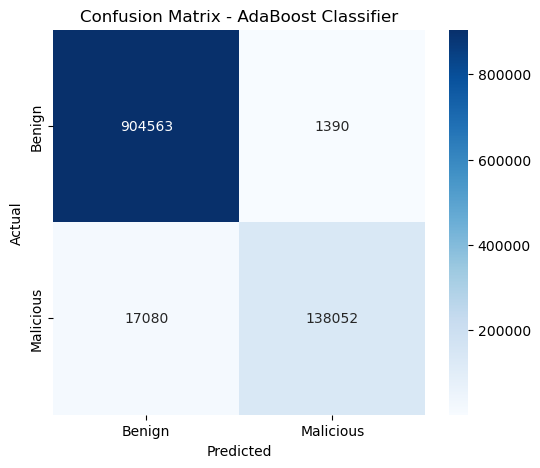

In [89]:

mapping = {0: "Benign", 1: "Malicious"}
conf_matrix = confusion_matrix(y_test, ada_predictions)
df_matrix = pd.DataFrame(
    conf_matrix,
    index=mapping.values(),
    columns=mapping.values()
)

plt.figure(figsize=(6,5))
sns.heatmap(df_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


In [79]:
from sklearn.ensemble import VotingClassifier
models = [
    ('rfc', RandomForestClassifier()),
    ('abc', AdaBoostClassifier()),
    ('gnb', GaussianNB())
]
voting = VotingClassifier(estimators=models, voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('abc', AdaBoostClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [90]:
voting_predictions = voting.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Accuracy of model: {voting_accuracy}\n")
report = classification_report(y_test, voting_predictions)
print(report)


Accuracy of model: 0.9752705956638723

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    905953
           1       0.93      0.90      0.91    155132

    accuracy                           0.98   1061085
   macro avg       0.95      0.95      0.95   1061085
weighted avg       0.98      0.98      0.98   1061085



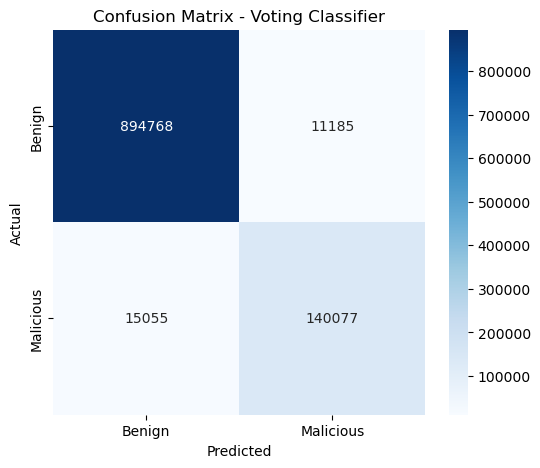

In [93]:
mapping = {0: "Benign", 1: "Malicious"}
conf_matrix = confusion_matrix(y_test, voting_predictions)
df_matrix = pd.DataFrame(
    conf_matrix,
    index=mapping.values(),
    columns=mapping.values()
)

plt.figure(figsize=(6,5))
sns.heatmap(df_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

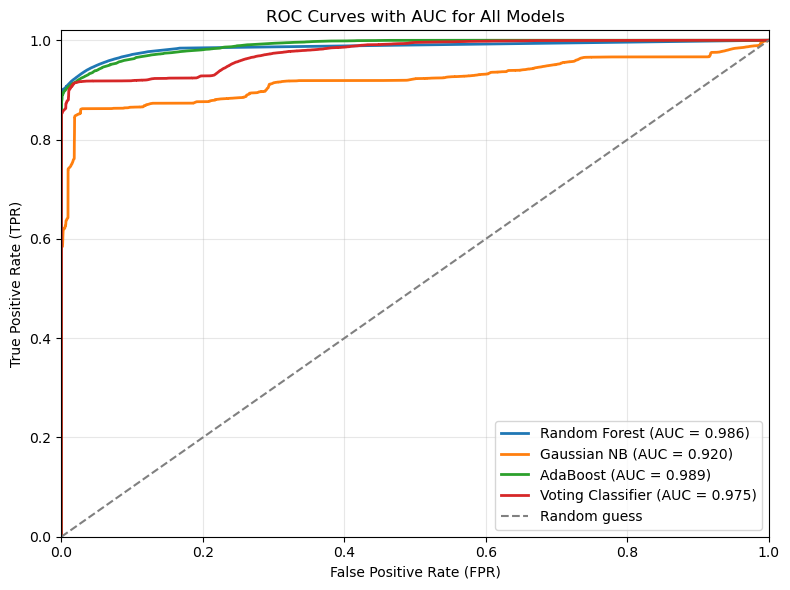

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Random Forest": model,     
    "Gaussian NB": gnb,
    "AdaBoost": ada,
    "Voting Classifier": voting
}

plt.figure(figsize=(8, 6))

roc_aucs = {}

for name, clf in models.items():
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = (fpr, tpr, roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves with AUC for All Models")
plt.grid(alpha=0.3)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [83]:
# === SAVE ARTIFACTS ===
import joblib, json
from pathlib import Path

MODELS_DIR = Path("models")
MODELS_DIR.mkdir(exist_ok=True, parents=True)

# 78 feature columns BEFORE SelectKBest (exclude 'Label')
feature_78 = [c for c in normalized_data.columns if c != "Label"]   # keeps order used to fit scaler

# 15 feature names AFTER SelectKBest (kept for sanity/debug)
feature_15 = list(X_selected.columns)

# (A) Save scaler and selector
joblib.dump(scaler, MODELS_DIR / "scaler.pkl")
joblib.dump(selector, MODELS_DIR / "selector.pkl")
print("✅ Saved scaler.pkl and selector.pkl")

# (B) Save models
joblib.dump(rf,      MODELS_DIR / "rf.pkl")
joblib.dump(ada,     MODELS_DIR / "ada.pkl")
joblib.dump(gnb,     MODELS_DIR / "gnb.pkl")
joblib.dump(voting,  MODELS_DIR / "voting.pkl")
print("✅ Saved rf.pkl, ada.pkl, gnb.pkl, voting.pkl")

# (C) Save feature lists (JSON)
(Path(MODELS_DIR / "feature_78.json")).write_text(json.dumps(feature_78, indent=2))
(Path(MODELS_DIR / "feature_15.json")).write_text(json.dumps(feature_15, indent=2))
print("✅ Saved feature_78.json and feature_15.json")

# (D) Save “raw input” expectation so the app can accept ORIGINAL CSV and reproduce training steps
RAW_REQUIRED = [
    # Original CIC-IDS-2018 columns you used BEFORE dropping/encoding (order is not required at inference)
    'Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts',
    'Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min',
    'Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max',
    'Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean',
    'Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
    'Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean',
    'Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt',
    'URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg',
    'Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg',
    'Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts',
    'Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std',
    'Idle Max','Idle Min',
    # optional: 'Label' may appear in uploaded CSV; app will drop it if present
]
(Path(MODELS_DIR / "raw_required.json")).write_text(json.dumps(RAW_REQUIRED, indent=2))
print("✅ Saved raw_required.json")


✅ Saved scaler.pkl and selector.pkl
✅ Saved rf.pkl, ada.pkl, gnb.pkl, voting.pkl
✅ Saved feature_78.json and feature_15.json
✅ Saved raw_required.json


In [10]:
import pandas as pd

# Load your original dataset
data = pd.read_csv("CSE-CIC-IDS2018/02-23-2018.csv")

# Check label distribution
print(data["Label"].value_counts())

# 15 benign + 15 attack samples
attack_15 = data[data["Label"] == "SQL Injection"].sample(15, random_state=42)
attack_15.to_csv("SQL.csv", index=False)

# Create three summary versions
# benign_only = data[data["Label"] == "Benign"].head(500)
# attack_only = data[data["Label"] != "Benign"].head(500)
# mixed_sample = pd.concat([benign_only.head(250), attack_only.head(250)]).sample(frac=1, random_state=42)

# benign_only.to_csv("benign_only.csv", index=False)
# attack_only.to_csv("attack_only.csv", index=False)
# mixed_sample.to_csv("mixed_sample.csv", index=False)

# print("✅ Saved: sample_benign_15.csv, Dosattack15.csv")


Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64


In [6]:
import pandas as pd

# Load dataset
data = pd.read_csv("CSE-CIC-IDS2018/02-14-2018.csv")

# Your needed features (exact names must match your CSV)
needed_features = [
    "Flow Duration",
    "Flow IAT Max",
    "Bwd IAT Tot",
    "ACK Flag Cnt",
    "Init Fwd Win Byts",
    "Fwd Pkt Len Max",
    "Fwd IAT Tot",
    "RST Flag Cnt",
    "ECE Flag Cnt",
    "Init Bwd Win Byts",
    "Fwd Pkt Len Std",
    "Fwd IAT Std",
    "PSH Flag Cnt",
    "Down/Up Ratio",
    "Fwd Seg Size Min",
    "Label"
]

# Filter: only needed features
filtered = data[needed_features]

# Filter only FTF-BruteForce rows
ftf = filtered[filtered["Label"] == "FTP-BruteForce"]

# Get any 15 random rows
sample_15 = ftf.sample(15, random_state=42)

# Print to terminal
print(sample_15.to_string(index=False))


 Flow Duration  Flow IAT Max  Bwd IAT Tot  ACK Flag Cnt  Init Fwd Win Byts  Fwd Pkt Len Max  Fwd IAT Tot  RST Flag Cnt  ECE Flag Cnt  Init Bwd Win Byts  Fwd Pkt Len Std  Fwd IAT Std  PSH Flag Cnt  Down/Up Ratio  Fwd Seg Size Min          Label
             1             1            0             0              26883                0            0             0             0                  0              0.0          0.0             1              1                40 FTP-BruteForce
             2             2            0             0              26883                0            0             0             0                  0              0.0          0.0             1              1                40 FTP-BruteForce
             2             2            0             0              26883                0            0             0             0                  0              0.0          0.0             1              1                40 FTP-BruteForce
             1          